This code is done for my practice for the **Bidirectional Neural Network**. You are welcome to use this code and update it for your use where ever you want.

The data was divided into train and test.

The image was of the size 28*28.
The image was normalized to have values between 0 and 1.

The first Layer  i created was an input layer for the network expecting a 28*28 input size.

All the following tasks wer performed on the original image and the rotated image, as originally their is no time in an image, but we will be taking the height and the width of the image as time.

**Layers:**

The first layer is the **Bidirectional LSTM layer** which has the hidden size of 100.
The second layer is the **Dropout Layer** with a rate of 0.2
The third layer is another **LSTM payer** with hidden size of 50
The fourth layer is a **Dropout Layer** with rate of 0.2
The fifth layer is a **Maxpooling Layer** which picks the maximum value out of the set of values

The same thing is done for the rotated image and both of the outputs are combined to form one single input for the coming Dense layers.

There are four **Dense Layers** of size **128, 64, 32, 16** with the 'relu' as the activation layer.
The last layer is the **Dense Layer** with **10 outputs **each for one digit and the activation function is softmax as this is a multi-class problem.

The **loss function** used for the model is sparse_crossentropy.

The **optimizer** is adam.

The **metric** used is accuracy

We have taken a **batch size** of 32 and run it for 5 **epochs** with a **validation split** of 0.2

We can play with all of the values to get a better result.

I got an **accuracy** of 93% for the training set, 97% for the validation set and 97.85% fo the test set.

In [0]:
#Importing required libraries

from keras import Model
from keras.layers import Bidirectional,LSTM,Concatenate,Input,Lambda,GlobalMaxPooling1D,Dense,Dropout
import keras.backend as K
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
import warnings
warnings.filterwarnings("ignore")


Using TensorFlow backend.


In [0]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()  # Loading the dataset from the package into train and test

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [0]:
# Normalization 

x_train = x_train/255
x_test  = x_test/255

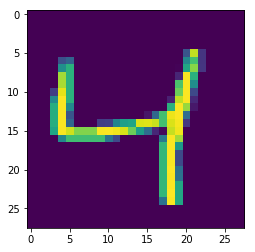

In [0]:
#Sample image

plt.imshow(x_train[2])

In [0]:
# Preparing the Input Layer for the Network

input_ = Input(shape=(x_train.shape[1],x_train.shape[2]))
print('Shape of the input: ',input_.shape)

W0718 12:46:01.634191 140105491625856 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0718 12:46:01.670797 140105491625856 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.



Shape of the input:  (?, 28, 28)


In [0]:
#First Bidirectional Layer for a LSTM layer

rnn1 = Bidirectional(LSTM(units=100,return_sequences = True))

In [0]:
# Executing Bidirectional and LSTM Layer

x = rnn1(input_)
print('Shape of the output from Birectional and LSTM Layer: ',x.shape)

W0718 12:46:02.330018 140105491625856 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



Shape of the output from Birectional and LSTM Layer:  (?, ?, 200)


In [0]:
# Dropout Layer for 1st LSTM

x = Dropout(rate=0.2)(x)
print('Shape of the output after Dropout: ',x.shape)

W0718 12:46:02.934491 140105491625856 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0718 12:46:02.947071 140105491625856 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Shape of the output after Dropout:  (?, ?, 200)


In [0]:
#2nd Layer of LSTM and Dropout

rnn12 = LSTM(units = 100,return_sequences = True)
x = rnn12(x)
x = Dropout(rate=0.2)(x)
print('Shape of the output after second Birectional,LSTM Layer and Dropout: ',x.shape)

Shape of the output after second Birectional,LSTM Layer and Dropout:  (?, ?, 100)


In [0]:
#MaxPooling Layer

x = GlobalMaxPooling1D()(x)
print('Shape of the output after MaxPooling: ',x.shape)

Shape of the output after MaxPooling:  (?, 100)


In [0]:
# Executing Bidirectional and LSTM Layer
rnn2 = Bidirectional(LSTM(units = 100,return_sequences = True))

#Rotating the image
permutor = Lambda(lambda t: K.permute_dimensions(t,pattern=(0,2,1)))

In [0]:
x2 = permutor(input_)
print('Shape of the output after Rotating: ',x2.shape)

Shape of the output after Rotating:  (?, 28, 28)


In [0]:
x2 = rnn1(x2)
print('Shape of the output from Birectional and LSTM Layer: ',x2.shape)

Shape of the output from Birectional and LSTM Layer:  (?, ?, 200)


In [0]:
#Dropout Layer

x2 = Dropout(rate=0.2)(x2)
print('Shape of the output after Dropout: ',x2.shape)

Shape of the output after Dropout:  (?, ?, 200)


In [0]:
#Second Layer of Bidirectional and LSTM

rnn22 = LSTM(units = 100,return_sequences = True)
x2 = rnn22(x2)
x2 = Dropout(rate=0.2)(x2)
print('Shape of the output after second Birectional,LSTM Layer and Dropout: ',x2.shape)

Shape of the output after second Birectional,LSTM Layer and Dropout:  (?, ?, 100)


In [0]:
#MaxPooling Layer

x2 = GlobalMaxPooling1D()(x2)
print('Shape of the output after MaxPooling: ',x2.shape)

Shape of the output after MaxPooling:  (?, 100)


In [0]:
concat = Concatenate(axis = 1)
x = concat([x,x2])
print('Shape of the output after Concatenating original and rotated image: ',x.shape)

Shape of the output after Concatenating original and rotated image:  (?, 200)


In [0]:
# Adding Dense Layer

x = Dense(activation = 'relu',units = 256)(x)
x = Dropout(rate=0.2)(x)
print('Shape of the output after first Dense Layer: ',x.shape)
x = Dense(activation = 'relu',units = 128)(x)
x = Dropout(rate=0.2)(x)
print('Shape of the output after second Dense Layer: ',x.shape)
x = Dense(activation = 'relu',units = 64)(x)
x = Dropout(rate=0.2)(x)
print('Shape of the output after third Dense Layer: ',x.shape)
x = Dense(activation = 'relu',units = 32)(x)
x = Dropout(rate=0.2)(x)
print('Shape of the output after fourth Dense Layer: ',x.shape)
x = Dense(activation = 'relu',units = 16)(x)
x = Dropout(rate=0.2)(x)
print('Shape of the output after fifth Dense Layer: ',x.shape)
x = Dropout(rate=0.2)(x)
output = Dense(activation='softmax',units=10)(x)
print('Shape of the output after last Dense Layer: ',output.shape)

Shape of the output after first Dense Layer:  (?, 256)
Shape of the output after second Dense Layer:  (?, 128)
Shape of the output after third Dense Layer:  (?, 64)
Shape of the output after fourth Dense Layer:  (?, 32)
Shape of the output after fifth Dense Layer:  (?, 16)
Shape of the output after last Dense Layer:  (?, 10)


In [0]:
#Training the model

model = Model(inputs = input_,outputs = output)

In [0]:
# Adding loss and optimizer for the model

model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

W0718 12:46:08.403540 140105491625856 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0718 12:46:08.430813 140105491625856 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3341: The name tf.log is deprecated. Please use tf.math.log instead.



In [0]:
#Fitting the model

history = model.fit(x_train,y_train,batch_size=32,epochs=5,validation_split=0.2)

W0718 12:46:09.279563 140105491625856 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 305s 6ms/step - loss: 0.9553 - acc: 0.6831 - val_loss: 0.2856 - val_acc: 0.9292
Epoch 2/5
48000/48000 [==============================] - 300s 6ms/step - loss: 0.4291 - acc: 0.8860 - val_loss: 0.2051 - val_acc: 0.9535
Epoch 3/5
48000/48000 [==============================] - 299s 6ms/step - loss: 0.3214 - acc: 0.9129 - val_loss: 0.1827 - val_acc: 0.9618
Epoch 4/5
48000/48000 [==============================] - 300s 6ms/step - loss: 0.2767 - acc: 0.9278 - val_loss: 0.1389 - val_acc: 0.9749
Epoch 5/5
48000/48000 [==============================] - 300s 6ms/step - loss: 0.2542 - acc: 0.9331 - val_loss: 0.1139 - val_acc: 0.9753


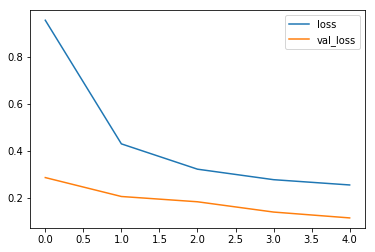

In [0]:
plt.plot(history.history['loss'],label = 'loss')
plt.plot(history.history['val_loss'],label = 'val_loss')
plt.legend()
plt.show()

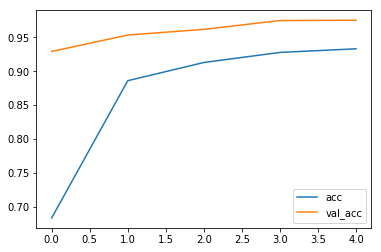

In [0]:
plt.plot(history.history['acc'],label = 'acc')
plt.plot(history.history['val_acc'],label = 'val_acc')
plt.legend()
plt.show()

In [0]:
pred = model.evaluate(x = x_test,y = y_test)
print('Loss: ' + str(pred[0]))
print('Accuracy: ' + str(pred[1]))

10000/10000 [==============================] - 13s 1ms/step
Loss: 0.10766158287620638
Accuracy: 0.9765


In [0]:
predicted_values = model.predict(x_test)

In [0]:
print(predicted_values.shape)


(10000, 10)


In [0]:
sum = 0
for i in range(0,10000):
  if(predicted_values[i].argmax() == y_test[i]):
    sum = sum + 1
    
print(sum/10000)

0.9765


Predicted:  9
Original:  9


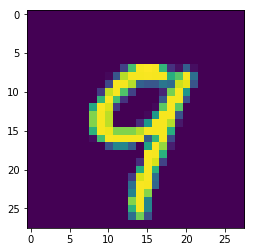

In [0]:
print('Predicted: ',predicted_values[12].argmax())
print('Original: ',y_test[12])
plt.imshow(x_test[12])